PROPERTY PRICE PREDICTION PROJECT 

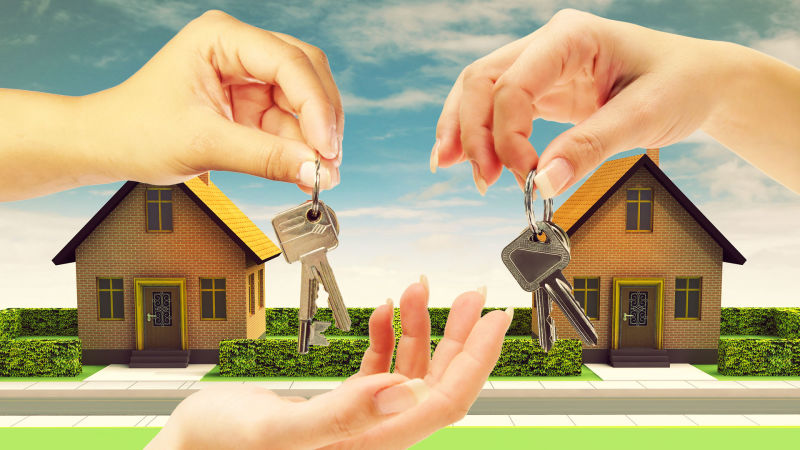

In [1]:
import IPython
IPython.display.Image('https://i-media.vyaparify.com/vcards/blogs/95898/Buysell1.jpg')

Problem Objective :
The project aims at building a model of housing prices to predict median house values in California using the provided dataset. This model should learn from the data and be able to predict the median housing price in any district, given all the other metrics.

Districts or block groups are the smallest geographical units for which the US Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). There are 20,640 districts in the project dataset.

# Step-1: Import Libraries

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
import os 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score
# Dataset:
from sklearn.datasets import fetch_california_housing

warnings.filterwarnings('ignore')
print('Modules Loaded Successfully!!')

Modules Loaded Successfully!!


# Step-2: Load Data/ Create DF

In [3]:
data_dict = fetch_california_housing()

data_dict.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
print(data_dict['feature_names'])

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


In [5]:
print(data_dict['target_names'])

['MedHouseVal']


In [6]:
df = pd.DataFrame(data_dict['data'], 
                  columns = data_dict['feature_names'])

df['MedHouseVal'] = data_dict['target']

print('Data Loaded Successfully!!')

Data Loaded Successfully!!


#Step 3: Understand Data using EDA

In [7]:
#Shape
df.shape

(20640, 9)

In [8]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [9]:
#Checking for null values
df.isna().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

In [10]:
print(data_dict['DESCR'])

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [11]:
df.sample()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
18250,4.5833,39.0,4.911111,1.073333,1023.0,2.273333,37.39,-122.08,3.424


In [12]:
# All data Must be in Numerical, Dataset contains all values in numerical
# We can proceed this for Analysis

In [ ]:
# Checking Data Distribution

sns.pairplot(data = df, corner = True)
plt.show()

In [ ]:
plt.title('Checking Features v/s Target Correlation')
sns.heatmap(df.corr().round(2),annot =True,cmap = 'mako')
plt.show()

In [ ]:
df.describe()

In [ ]:
plt.figure(figsize = (15,10))
for i,j in enumerate(df.columns):
    plt.subplot(3,3,i+1)
    plt.hist(df[j],color = 'blue', alpha = 0.3)
    plt.title(j+' Analaysis')
plt.show()

In [ ]:
# Distribution of Target Value MedHouseVal v/s MedInc

plt.title('MedHouseVal Distribution')
sns.histplot(data = df, x = 'MedHouseVal', color = 'b', kde = True)
plt.show()

In [ ]:
# # Distribution of Target Value MedHouseVal v/s MedInc

# sns.regplot(data = df, x = 'MedHouseVal', y = 'MedInc')
# plt.show()

In [ ]:
df['MedHouseVal'].describe()

# 75% of the Price is less than $264,000

# Step-4 : Feature Engineering and Preprocessing 

In [ ]:
# Convert data to same scale for better prediction 
# Using either standardization or normalization technique 
# Normalization = MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler


X = df.iloc[:,:-1]
y = df['MedHouseVal']


scaler = MinMaxScaler()

scaler.fit(X) # Learning: Fit data in 0 to 1 
X_scaled = scaler.transform(X)

print('Done')

In [ ]:
print(X_scaled.min())
print(X_scaled.max())

In [ ]:
print('Done124')

# Step-5: Train Test Split: Data for Training and Testing

In [ ]:
# train_test_split : a function dividing data into training and testing part 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state =150) 
# Order is pre-defined                                                            random_state fixes the shuffled values till the value remains same  
#                                                                                 similar to random.seed(..) of random module
print('Done')

In [ ]:
print('Shape of X_train',X_train.shape)
print('Shape of X_test',X_test.shape)
print('Shape of Y_train',y_train.shape)
print('Shape of Y_test',y_test.shape)

In [ ]:
X_scaled.shape

# Step- 6: Model Building 

## Step-6.1: Linear model using Linear Regression 

In [ ]:
lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

###### Step- 6.1.2: Model Prediction  

In [ ]:
y_pred = lr_model.predict(X_test)
print('Done')

In [ ]:
lr_compare_df =  pd.DataFrame({'Actual House Price: ':y_test,
                              'Predicted House Price':y_pred})

In [ ]:
lr_compare_df

In [ ]:
lr_mae = mean_absolute_error(y_test,y_pred)
print('Lr MAE',lr_mae)

In [ ]:
lr_mse = mean_squared_error(y_test,y_pred)
print('Lr MSE',lr_mse)


In [ ]:
lr_rmse = lr_mse**.5
print('Lr RMSE',lr_rmse)

In [ ]:
# Training Score

lr_train_score = lr_model.score(X_train,y_train)
print('Training Score: ',lr_train_score)
# Testing Score

lr_test_score = lr_model.score(X_test,y_test)
print('Testing Score: ',lr_test_score)

In [ ]:
# If model score is 60%(approx.) model is not that good it can be improved
# VIF(Variance Inflation Factor) : to check influence of variance 

# if VIF > 10 we can drop because multi-collinearity is increasing
# Bias v/s Variance Trade Off: Intersect (used to find balancedfit)

# Training Score : High, Testing Score: Low ==> Overfitting
# Training Score : Low,  Testing Score: Low ==> Underfitting
# Training Score : Good, Testing Score: Good => Balancedfit
# Model Overfit > Biasness increases 
# Model Undefit > Variance Increases

# PCA stands for Principal Component Analysis, a dimensionality reduction technique
# PCA : Imp Features(cols) Find: (8: 5 Imp)

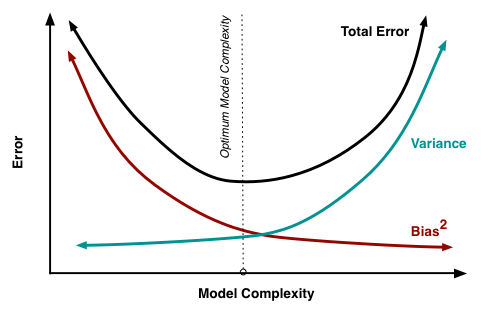

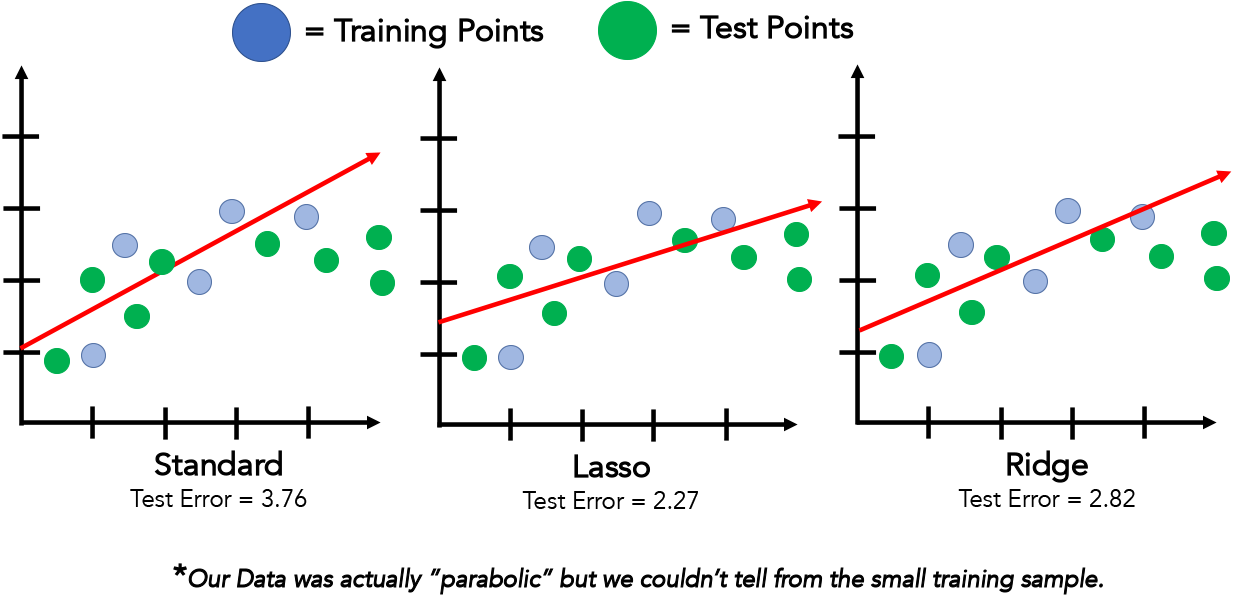

###### Step- 6.1.3: Checking VIF and Drop column if value vif>10

In [ ]:
X_train_df = pd.DataFrame(X_train, columns = data_dict['feature_names']) 
X_train_df.sample()

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor # checks correlation between columns

X_train_df['intercept'] = 1
 
X_train_df.sample()

In [ ]:
# X_train_df.shape

In [ ]:
# X_train_df.columns

In [ ]:
# X_train_df.values

In [ ]:
vif_df = pd.DataFrame()

vif_df['Features'] = list(data_dict['feature_names']) + ['Intercept']

vif_value = [variance_inflation_factor(X_train_df.values,i) for i in range (X_train_df.shape[1])]

vif_df['VIF Factor'] = vif_value

vif_df.sort_values(by = 'VIF Factor', ascending = False)

# Because Latitude and Longitude have high corr and vif close to 10 we can drop one or both 

In [ ]:
vif_df.columns

In [ ]:
col = list(X.columns)
new_col = col.remove('Latitude')
# print(col)

X_train_vif = X_train_df[col]
X_train_vif.sample()

In [ ]:
def built_model(ml_model,col):
    new_X_train=pd.DataFrame(X_train,columns=data_dict['feature_names'])
    final_X_train=new_X_train[col]

    new_X_test=pd.DataFrame(X_test,columns=data_dict['feature_names'])
    final_X_test=new_X_test[col]

    machine_model=ml_model()
    machine_model.fit(final_X_train,y_train)

    model_y_pred=machine_model.predict(final_X_test)
    model_train_score=machine_model.score(final_X_train,y_train)
    model_test_score=machine_model.score(final_X_test,y_test)
    model_mae_error=mean_absolute_error(y_test,model_y_pred)
    model_mse_error=mean_squared_error(y_test,model_y_pred)
    model_rmse_error=model_mse_error**.5
    model_r2_score=r2_score(y_test,model_y_pred)
    model_metrics={'model training score':model_train_score,'model test score':model_test_score,'MAE error':model_mae_error,'MSE error':
              model_mse_error,'RMSE error':model_rmse_error,'R2 score':model_r2_score}
    model_matrix = pd.DataFrame(model_metrics,index = [1])
    return model_matrix,machine_model


In [ ]:
ml_model=LinearRegression
built_model(ml_model,col)[0]

In [ ]:
from sklearn.linear_model import Lasso,Ridge
ml_model=Lasso
built_model(ml_model,col)[0]

In [ ]:
ml_model=Lasso
built_model(ml_model,col)[0]

In [ ]:
print(col)

In [ ]:
col=['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup']

In [ ]:
all_model = [LinearRegression, Ridge]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

ss_X = sc.fit_transform(X)

i = 1
while True:
  X_train, X_test, y_train, y_test = train_test_split(ss_X, y,random_state=i,test_size=0.1)
  i += 1

  temp_df,final_model= built_model(Ridge,col)
  score = temp_df['model test score'].values[0]

  print('Score is:',score)
  if score >= 0.6:
    print('Best random State',i)
    display(temp_df)
    break
  display(clear=True)

In [ ]:
final_model

# Step-7: Save Model And Extra Objects

In [ ]:
import pickle
with open("house price prediction model.pkl",'wb') as f:
    pickle.dump(final_model,f)

with open('ss_scaler.pkl','wb') as f:
    pickle.dump(sc,f)

print('ML model and Scaller is saved successfully')

In [ ]:
#Ml Model: Client:
# Website: Input Value: Prediction
# Website: Python: Django, Flask, Fastapi, : Streamlit
# Streamlit: Python Web-based, Framework, Fast ML model test website
# Streamlit = Devlpoment + Deployment(For ML Engineers)

In [ ]:
import streamlit as st

In [ ]:
import os 
os.getcwd()

In [ ]:
col

In [ ]:
for i in df[col]:
    min_value, max_value = df[i].agg(['min','max'])

    print('min',i,min_value)
    print('max',i,max_value)


In [ ]:
df.to_csv('california.csv')
print("done")

In [ ]:
# read_data
temp_df = pd.read_csv('california.csv')

for i in temp_df[col]:
    min_value, max_value = df[i].agg(['min','max'])

In [60]:
pd.__version__

'2.2.3'

In [61]:
st.__version__

'1.45.1'